In [20]:
%matplotlib inline 
import numpy as np
import pandas as pd
from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score
from sklearn.naive_bayes import GaussianNB
from scipy.stats import zscore
import seaborn as sns

In [21]:
#Q1.Read the column description and ensure you understand each attribute well?
#Q2.Study the data distribution in each attribute, share your findings. (5 points)?
#Q3.Get the target column distribution. Your comments?

In [23]:
colnames = ['income', 'zip', 'family', 'ccAvg', 'education', 'mortgage', 'personalLoan', 'securityAccount', 'cdAccount','online','creditCard']

In [24]:
df=pd.read_csv('Bank_Personal_Loan_Modelling-1.csv')
loan_df = pd.DataFrame(df)

loan_df.columns = loan_df.columns.str.replace(' ','')
loan_df.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [25]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                   5000 non-null int64
Age                  5000 non-null int64
Experience           5000 non-null int64
Income               5000 non-null int64
ZIPCode              5000 non-null int64
Family               5000 non-null int64
CCAvg                5000 non-null float64
Education            5000 non-null int64
Mortgage             5000 non-null int64
PersonalLoan         5000 non-null int64
SecuritiesAccount    5000 non-null int64
CDAccount            5000 non-null int64
Online               5000 non-null int64
CreditCard           5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [26]:
loan_df['PersonalLoan'] = loan_df.PersonalLoan.astype('category')
loan_df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIPCode                 int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
PersonalLoan         category
SecuritiesAccount       int64
CDAccount               int64
Online                  int64
CreditCard              int64
dtype: object

In [27]:
loan_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
SecuritiesAccount,5000.0,0.104400,0.305809,0.0,0.00,0.0,0.00,1.0


In [28]:
loan_df.groupby(["PersonalLoan"]).count()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,SecuritiesAccount,CDAccount,Online,CreditCard
PersonalLoan,,,,,,,,,,,,,
0,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520
1,480,480,480,480,480,480,480,480,480,480,480,480,480


In [29]:
# The first column is id column which is patient id and nothing to do with the model attriibutes. So drop it.

new_loan_df = loan_df.drop(labels = "ID", axis = 1)

In [31]:
new_loan_df.shape

(5000, 13)

In [36]:
ip_df_loan = new_loan_df.drop(labels="PersonalLoan" , axis=1)
dep_df_loan = new_loan_df.PersonalLoan

In [37]:
ip_df_loan.head()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,SecuritiesAccount,CDAccount,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,1


In [38]:
ip_df_loan_z = ip_df_loan.apply(zscore)  # convert all attributes to Z scale 

ip_df_loan_z.describe()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,SecuritiesAccount,CDAccount,Online,CreditCard
count,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03
mean,2.478018e-17,-1.693312e-16,1.939449e-16,1.513445e-15,7.850609e-16,-2.078338e-17,-6.315837e-16,2.810197e-16,5.092149e-16,4.426903e-16,2.986500e-16,-3.697931e-16
std,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00
min,-1.948906e+00,-2.014911e+00,-1.428969e+00,-3.951919e+01,-1.216855e+00,-1.108987e+00,-1.049078e+00,-5.555239e-01,-3.414233e-01,-2.535403e-01,-1.216618e+00,-6.453143e-01
25%,-9.019702e-01,-8.812043e-01,-7.554825e-01,-5.851619e-01,-1.216855e+00,-7.084116e-01,-1.049078e+00,-5.555239e-01,-3.414233e-01,-2.535403e-01,-1.216618e+00,-6.453143e-01
50%,-2.952359e-02,-9.121982e-03,-2.123482e-01,1.340930e-01,-3.454321e-01,-2.506106e-01,1.417029e-01,-5.555239e-01,-3.414233e-01,-2.535403e-01,8.219509e-01,-6.453143e-01
75%,8.429230e-01,8.629604e-01,5.263146e-01,6.860245e-01,5.259909e-01,3.216407e-01,1.332484e+00,4.375576e-01,-3.414233e-01,-2.535403e-01,8.219509e-01,1.549632e+00
max,1.889859e+00,1.996667e+00,3.263712e+00,1.648959e+00,1.397414e+00,4.613525e+00,1.332484e+00,5.688108e+00,2.928915e+00,3.944146e+00,8.219509e-01,1.549632e+00


In [39]:
X = np.array(ip_df_loan_z)
X.shape

(5000, 12)

In [41]:
y=dep_df_loan
y.shape

(5000,)

In [53]:
#Q4. Split the data into training and test set in the ratio of 70:30 respectively?
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=7)

# Q5. Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a liability customer buying personal loans (15 points)

# KNN Neighbors 

In [54]:
NNH = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )


In [55]:
NNH.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='distance')

In [56]:
predicted_labels = NNH.predict(X_test)
NNH.score(X_test, y_test)

0.9593333333333334

In [57]:
from sklearn import metrics

print(pd.DataFrame(metrics.confusion_matrix(y_test, predicted_labels, labels=["M" ,"B"]), index=['true:yes', 'true:no'], columns=['pred:yes', 'pred:no']))

C:\Users\dj325\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:261: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if np.all([l not in y_true for l in labels]):


ValueError: At least one label specified must be in y_true

C:\Users\dj325\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\dj325\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


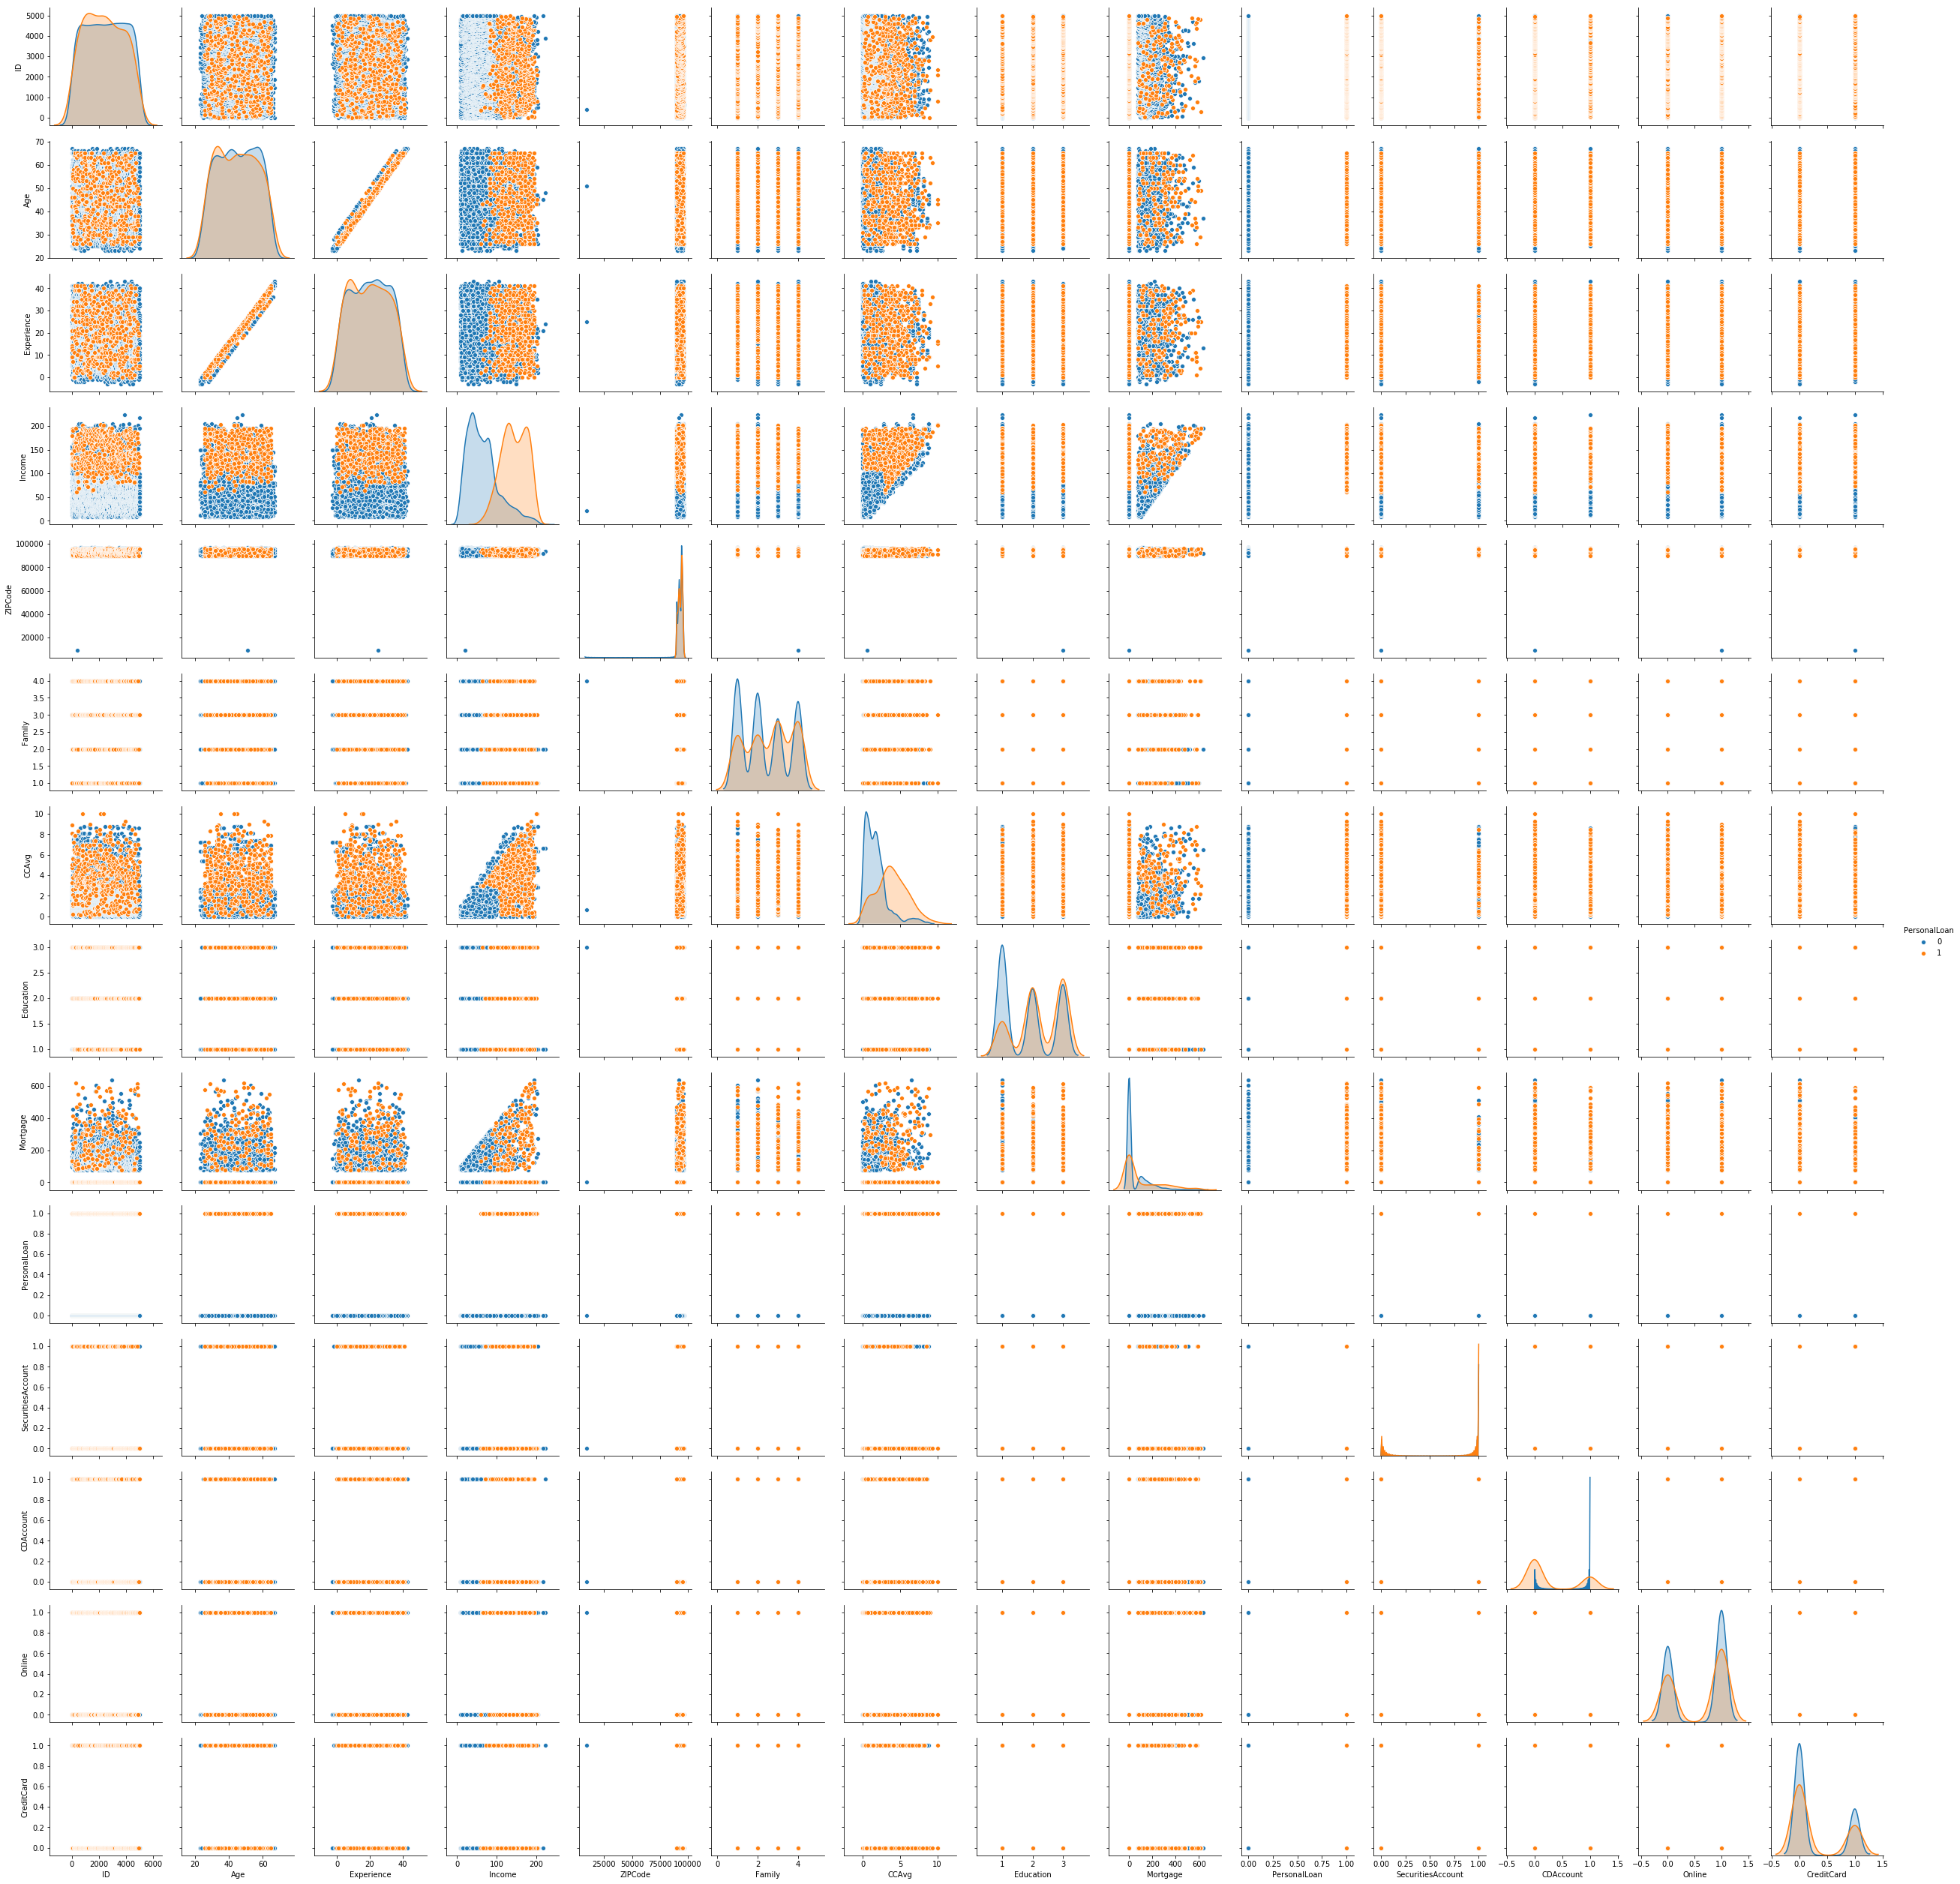

In [51]:
sns.pairplot(loan_df,hue='PersonalLoan' , diag_kind = 'kde')

# Logistic Regression

In [58]:
model = LogisticRegression()
model.fit(X_train, y_train) #best logistic surface(logOdds)
y_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_predict))
print(metrics.classification_report(y_test, y_predict))

0.9546666666666667
[[1344   18]
 [  50   88]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1362
           1       0.83      0.64      0.72       138

   micro avg       0.95      0.95      0.95      1500
   macro avg       0.90      0.81      0.85      1500
weighted avg       0.95      0.95      0.95      1500



C:\Users\dj325\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# Naive Bayes Theorem

In [68]:
train_set, test_set, train_labels, test_labels = train_test_split(X, y, test_size=0.30, random_state=50)

In [69]:
model = GaussianNB()
model.fit(train_set, train_labels)

GaussianNB(priors=None, var_smoothing=1e-09)

In [70]:
model.score(train_set , train_labels) 

0.8894285714285715

In [71]:
test_pred = model.predict(test_set)

print(metrics.classification_report(test_labels, test_pred))
print(metrics.confusion_matrix(test_labels, test_pred))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93      1358
           1       0.38      0.52      0.44       142

   micro avg       0.88      0.88      0.88      1500
   macro avg       0.67      0.72      0.69      1500
weighted avg       0.89      0.88      0.88      1500

[[1239  119]
 [  68   74]]


In [72]:
from sklearn.model_selection import cross_val_score, cross_val_predict


scores = cross_val_score(model, train_set, train_labels, cv=10)
print("Cross-validated scores:", scores , scores)
print("Average score:" , np.average(scores))

Cross-validated scores: [0.88888889 0.9031339  0.88285714 0.88857143 0.88       0.87428571
 0.88571429 0.87428571 0.9025788  0.89684814] [0.88888889 0.9031339  0.88285714 0.88857143 0.88       0.87428571
 0.88571429 0.87428571 0.9025788  0.89684814]
Average score: 0.8877164011834499


In [74]:
#Give your reasoning on which is the best model in this case and why it performs better? (5 points)?
#Answer: Logistic regression performed better. But It may be bias value since who do not have applied personal loadn are counter more tha who have applied. So here gausian may be more correct.